In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

heart = pd.read_csv('Heart_Attack.csv')
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from numpy._core.fromnumeric import size
print(f'Shape:    {heart.shape} \n')
print(f' Size:   {heart.size} \n' )
print(f'Dimension:    {heart.ndim} \n')

#Check for null values
heart.isnull().sum

#Check for duplicates
heart.loc[heart.duplicated(keep=False), :]


Shape:    (303, 14) 

 Size:   4242 

Dimension:    2 



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
#Check for duplicates
heart.loc[heart.duplicated(keep=False), :]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart.nunique()

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [ ]:
#Identifying the categorical and numerical features
numeric_cols = heart.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = heart.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_cols, categorical_cols

(['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal',
  'target'],
 [])

In [ ]:
heart_clean = heart.drop_duplicates()
heart_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
desc = heart_clean[numeric_cols].describe().T
desc["skew"] = heart_clean[numeric_cols].skew()
desc

,count,mean,std,min,25%,50%,75%,max,skew
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0,-0.203743
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0,-0.786120
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0,0.493022
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0,0.716541
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0,1.147332
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0,1.981201
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0,0.169467
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0,-0.532671
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0,0.737281
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2,1.266173


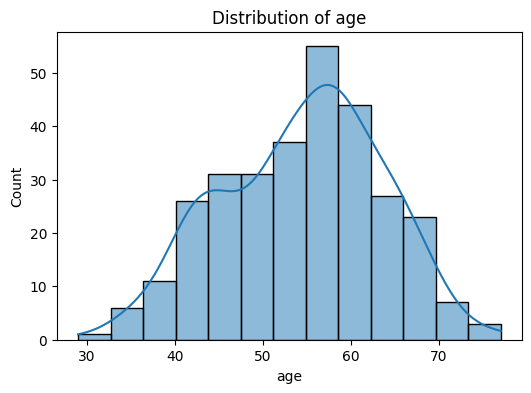

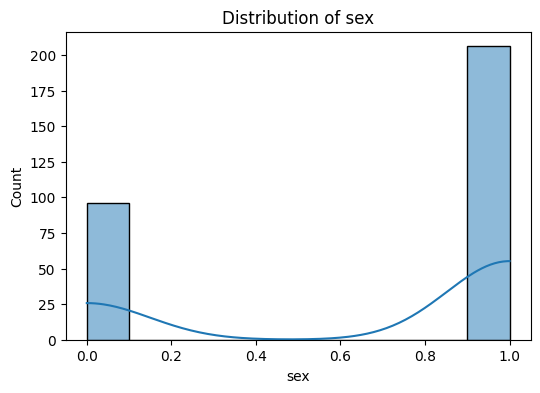

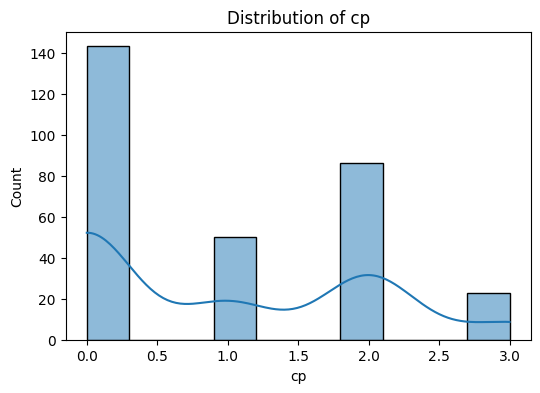

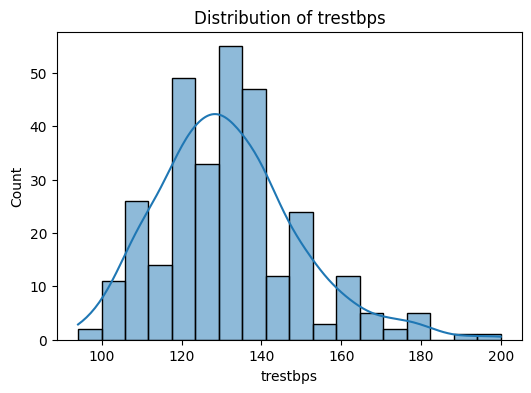

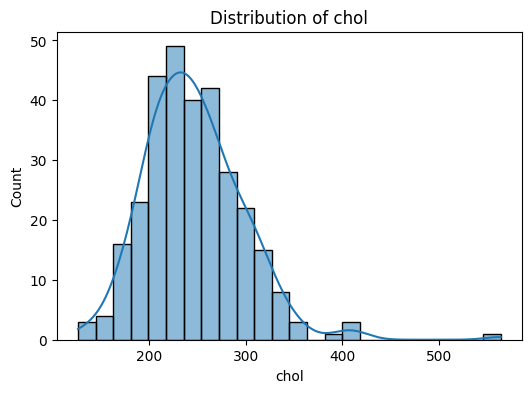

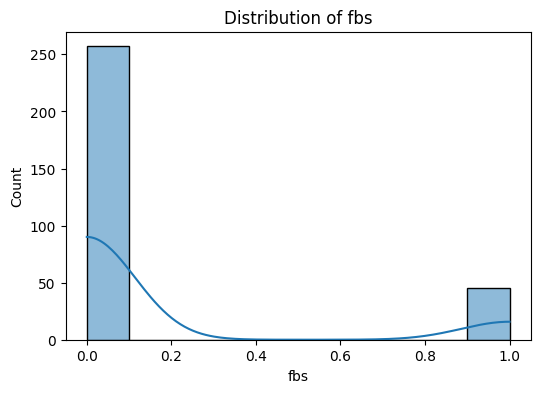

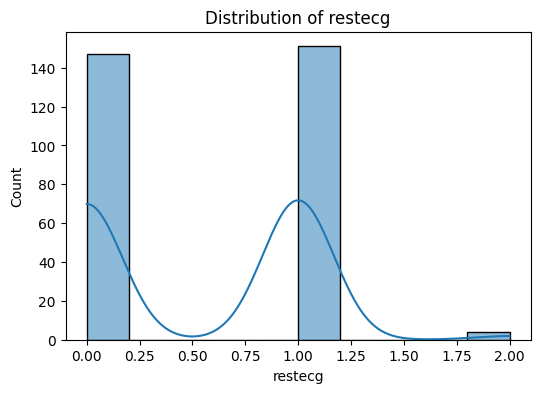

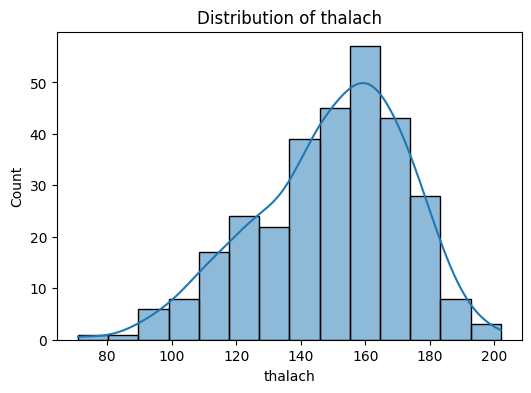

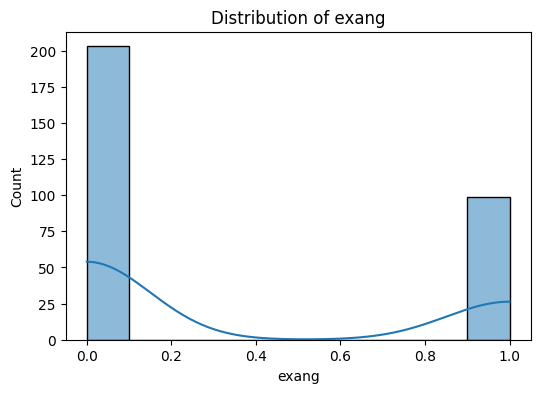

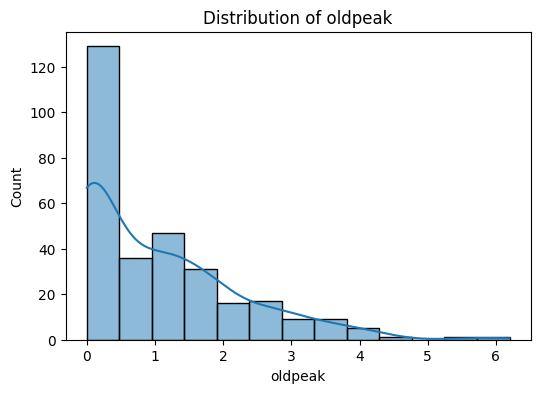

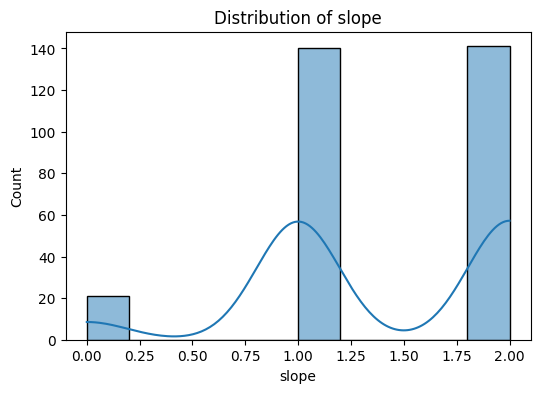

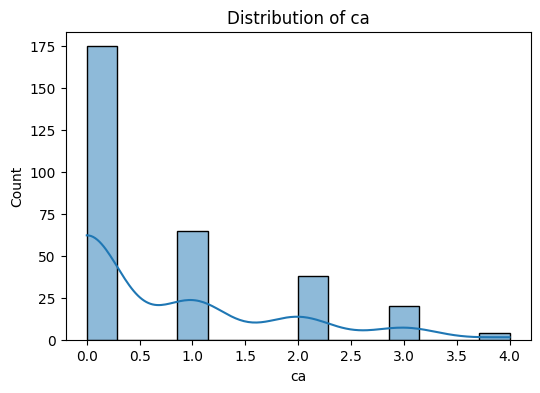

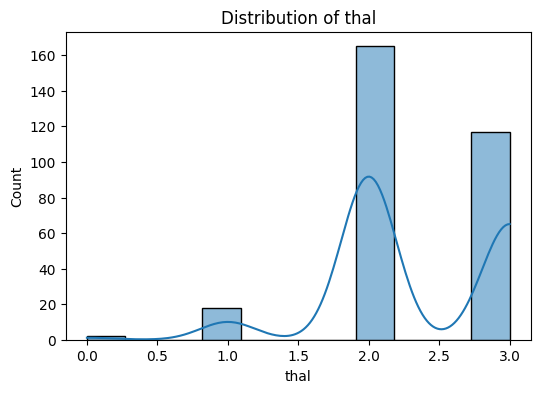

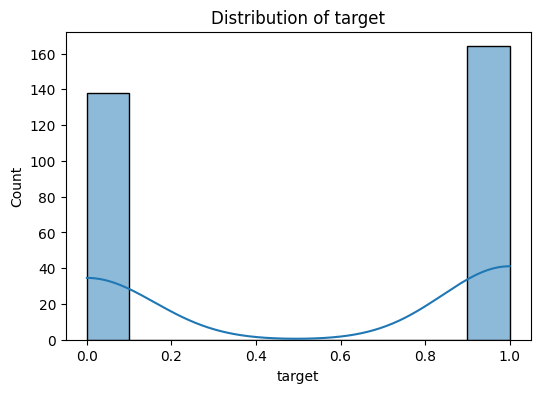

In [ ]:
#Histogram plot of the numerical columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(heart_clean[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

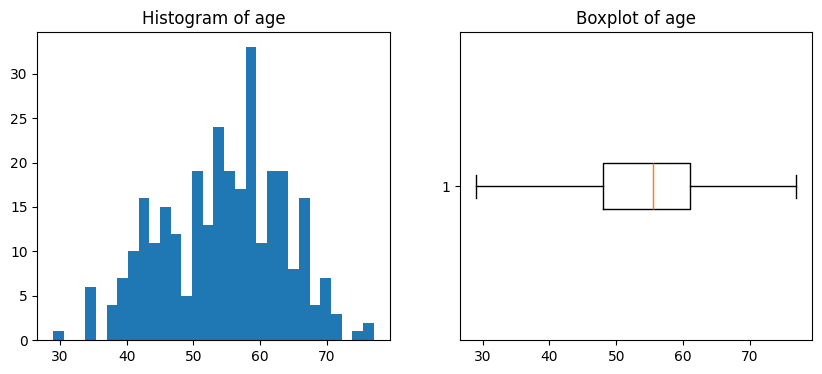

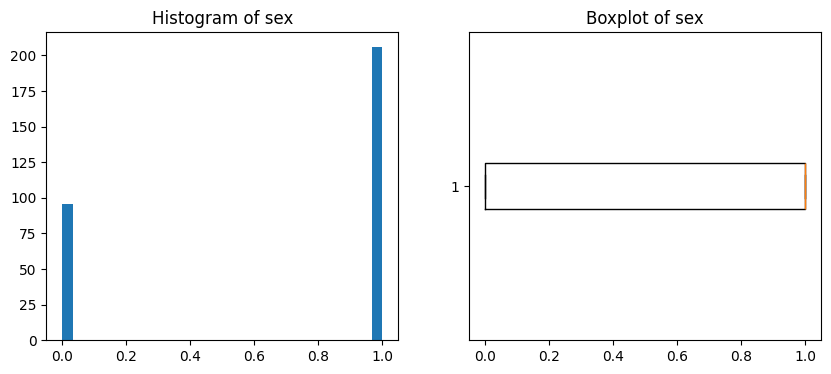

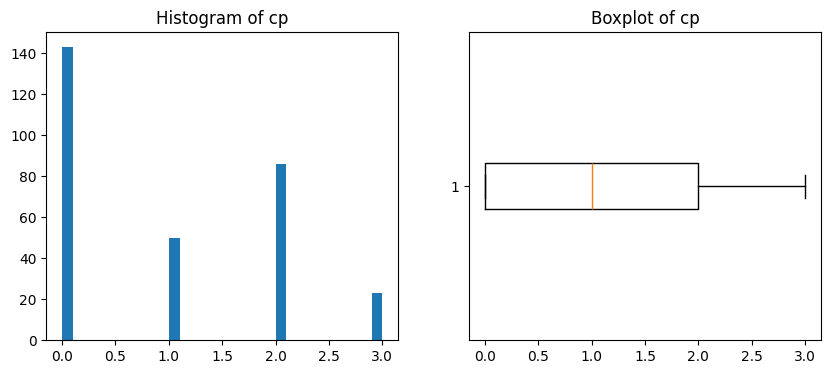

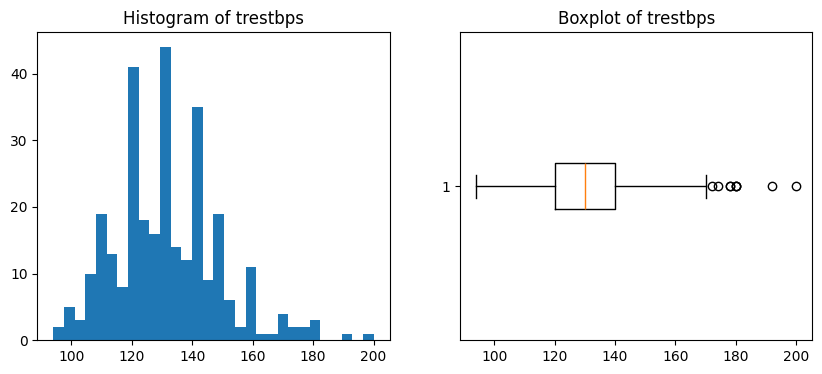

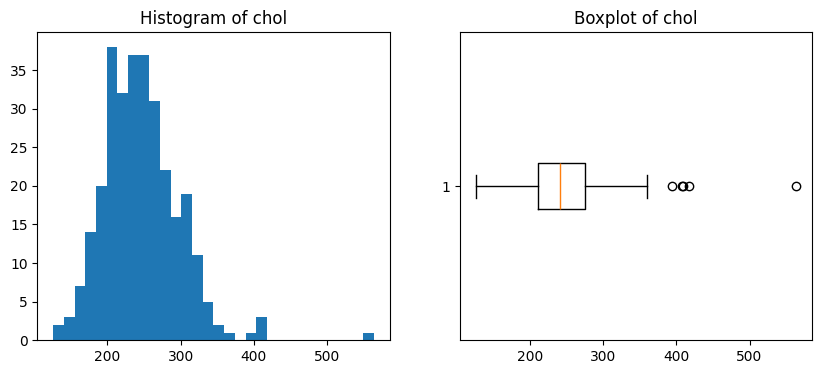

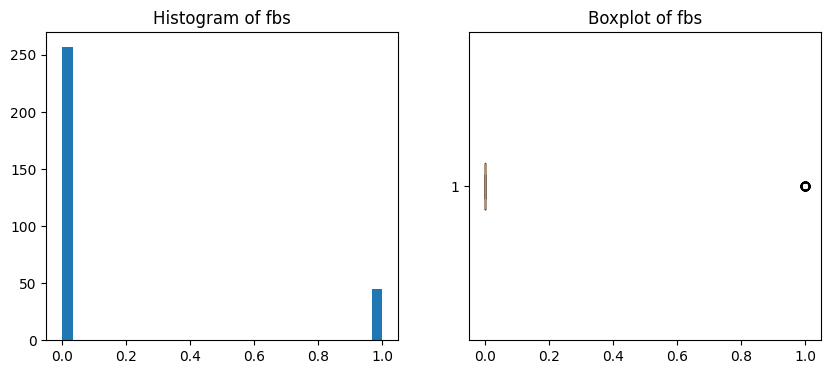

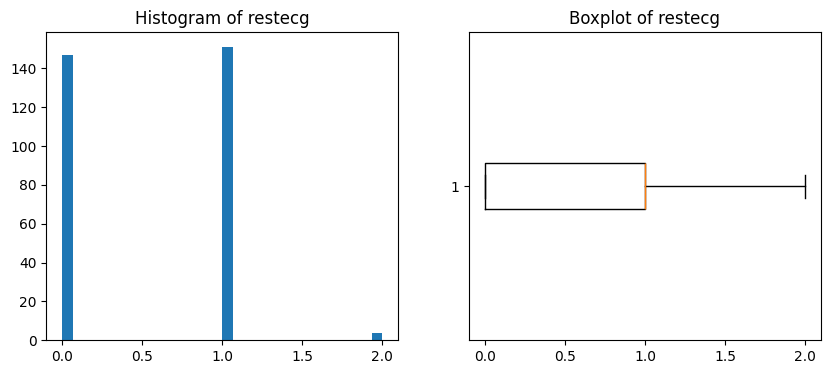

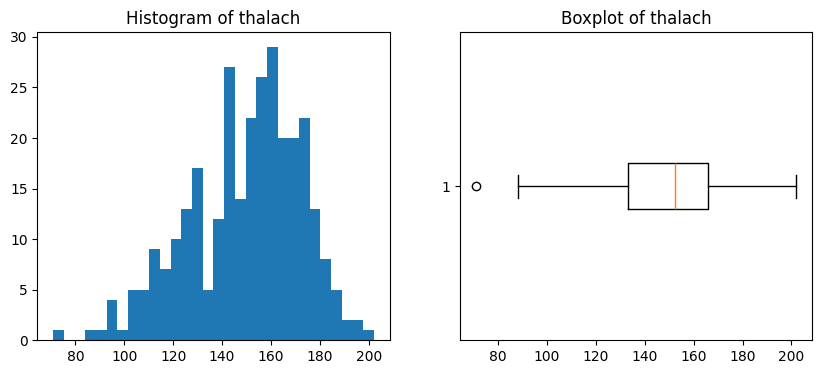

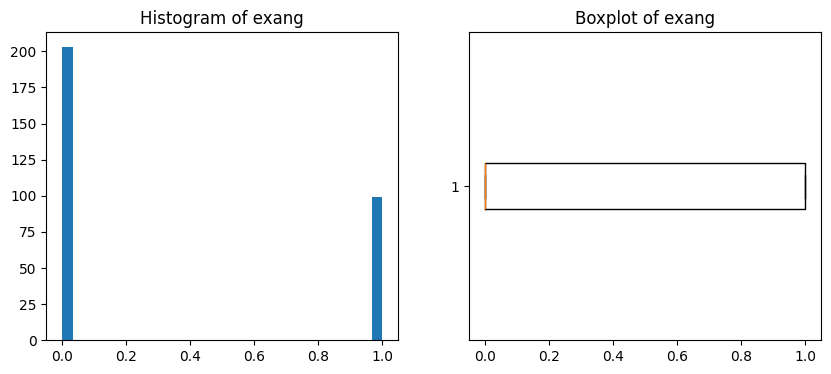

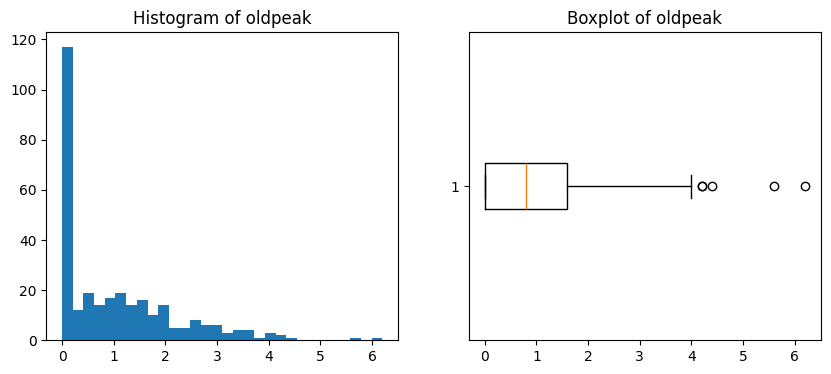

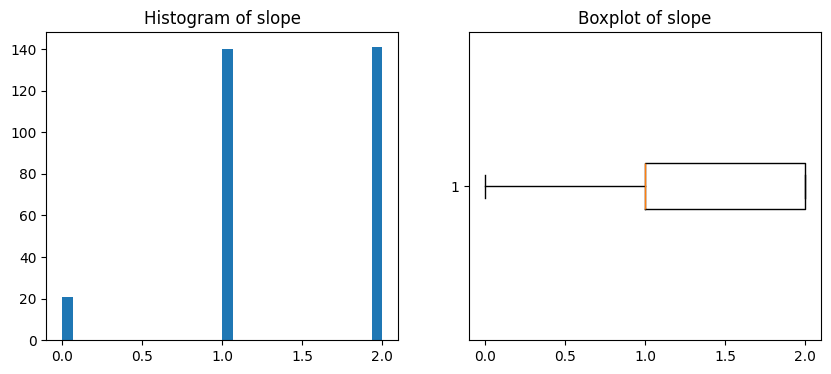

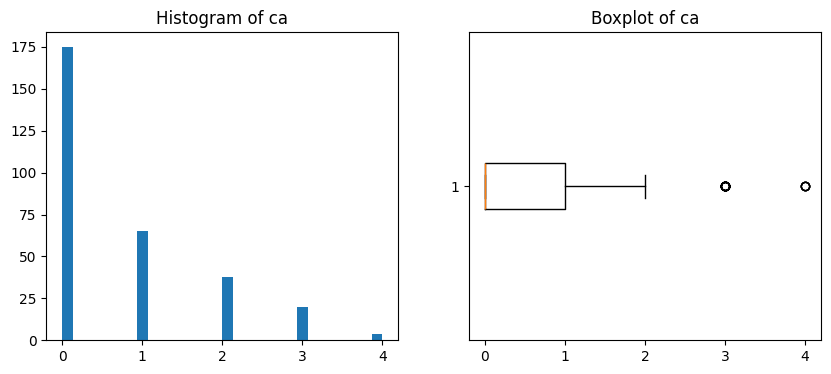

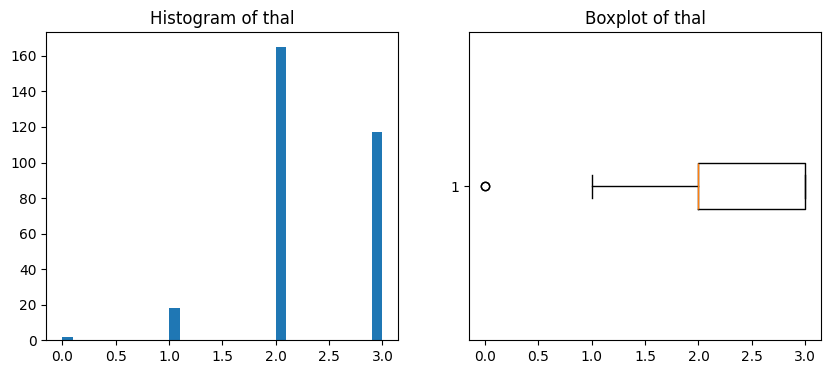

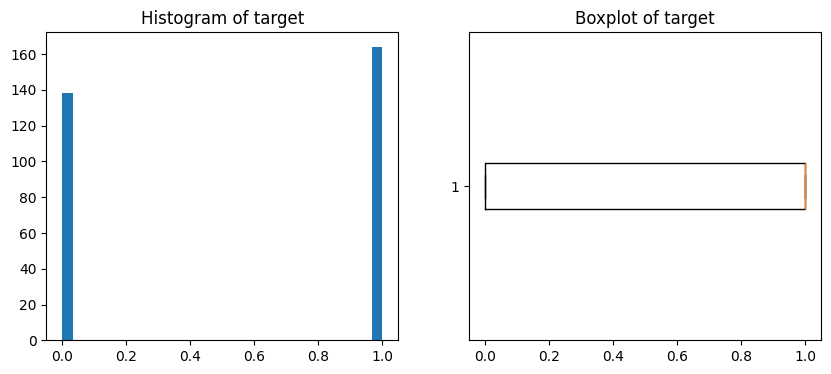

In [ ]:
#Numerical values vs target
for col in numeric_cols:
    plt.figure(figsize=(10,4))

    plt.subplot(1,2,1)
    plt.hist(heart_clean[col], bins=30)
    plt.title(f"Histogram of {col}")

    plt.subplot(1,2,2)
    plt.boxplot(heart_clean[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")

    plt.show()

In [ ]:
# categorical features vs target
# Checking for the target
target = None
for col in heart_clean.columns:
    if heart_clean[col].nunique() == 2:
        target = col
        break

print("Detected Target:", target)

for col in categorical_cols:
    if col == target:
        continue

    print(f"\n=== {col} vs {target} ===")
    ct = pd.crosstab(heart_clean[col], heart_clean[target], normalize="index") * 100
    print(ct.round(2))

    sns.countplot(data=heart_clean, x=col, hue=target)
    plt.title(f"{col} vs {target}")
    plt.show()

Detected Target: sex


In [ ]:
# Correlation Matrix
corr = heart_clean[numeric_cols + [target]].corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476,-0.094962
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609,1.000000
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080,-0.051740
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269,-0.057647
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437,-0.195571
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826,0.046022
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874,-0.060351
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955,-0.046439
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601,0.143460
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146,0.098322
